# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Total Number if Cities is {len(cities)}")

Total Number if Cities is 612


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
import json

print("Beginning Data Retrieval")
print("--"*30)

cw = []

for index in range(len(cities)):

    print(f"Processing Record {index} | {cities[index]}")


Beginning Data Retrieval
------------------------------------------------------------
Processing Record 0 | puerto ayora
Processing Record 1 | port alfred
Processing Record 2 | esperance
Processing Record 3 | bluff
Processing Record 4 | college
Processing Record 5 | mys shmidta
Processing Record 6 | baherden
Processing Record 7 | castro
Processing Record 8 | clyde river
Processing Record 9 | ushuaia
Processing Record 10 | vaini
Processing Record 11 | barrow
Processing Record 12 | mallama
Processing Record 13 | krasnystaw
Processing Record 14 | rikitea
Processing Record 15 | itapora
Processing Record 16 | albany
Processing Record 17 | khatanga
Processing Record 18 | bilma
Processing Record 19 | airai
Processing Record 20 | dzheguta
Processing Record 21 | paracuru
Processing Record 22 | imeni poliny osipenko
Processing Record 23 | grindavik
Processing Record 24 | ape
Processing Record 25 | kodiak
Processing Record 26 | qaanaaq
Processing Record 27 | cape town
Processing Record 28 | torba

In [6]:
print(json.dumps(cw, indent=4, sort_keys=2))

[]


In [7]:
CW=pd.DataFrame({"City": cities})
# CW['City'] = ""
CW['Cloudiness'] = ""
CW['Country'] = ""
CW['Date'] = ""
CW['Humidity'] = ""
CW['Lat'] = ""
CW['Lng'] = ""
CW['Max Temp'] = ""
CW['Wind Speed'] = ""
CW.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,,,,,,,,
1,port alfred,,,,,,,,
2,esperance,,,,,,,,
3,bluff,,,,,,,,
4,college,,,,,,,,


In [8]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&appid={weather_api_key}"
print(query_url)
response = requests.get(query_url).json()
print(json.dumps(response, indent=4))
response["name"]

http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&appid=befa291f2b63ca9080438274306d9a16
{
    "coord": {
        "lon": -73.97,
        "lat": 42.6
    },
    "weather": [
        {
            "id": 501,
            "main": "Rain",
            "description": "moderate rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 51.1,
        "feels_like": 43.48,
        "temp_min": 48.99,
        "temp_max": 52,
        "pressure": 1000,
        "humidity": 37
    },
    "wind": {
        "speed": 5.7,
        "deg": 310
    },
    "rain": {
        "1h": 1.62
    },
    "clouds": {
        "all": 100
    },
    "dt": 1588976680,
    "sys": {
        "type": 3,
        "id": 19530,
        "country": "US",
        "sunrise": 1588930858,
        "sunset": 1588982624
    },
    "timezone": -14400,
    "id": 5106841,
    "name": "Albany",
    "cod": 200
}


'Albany'

In [9]:
for index, row in CW.iterrows():
    city = row['City']
    
    print(f"Retrieving Results for Index {index}:")
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
    print(query_url)
    response = requests.get(query_url).json()
#     CW.append(response.json())
    
    try:
        
        CW.loc[index, 'City'] = response['name']
        CW.loc[index, 'Cloudiness'] = response['clouds']['all']
        CW.loc[index, 'Country'] = response['sys']['country']
        CW.loc[index, 'Date'] = response['dt']
        CW.loc[index, 'Humidity'] = response['main']['humidity']
        CW.loc[index, 'Lat'] = response['coord']['lon']
        CW.loc[index, 'Lng'] = response['coord']['lat']
        CW.loc[index, 'Max Temp'] = response['main']['temp_max']
        CW.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


Retrieving Results for Index 0:
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 1:
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 2:
http://api.openweathermap.org/data/2.5/weather?q=esperance&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 3:
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 4:
http://api.openweathermap.org/data/2.5/weather?q=college&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 5:
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 6:
http://api.openweathermap.org/data/2.5/weather?q=baherden&units

Retrieving Results for Index 56:
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 57:
http://api.openweathermap.org/data/2.5/weather?q=zyryanka&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 58:
http://api.openweathermap.org/data/2.5/weather?q=springfield&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 59:
http://api.openweathermap.org/data/2.5/weather?q=seoul&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 60:
http://api.openweathermap.org/data/2.5/weather?q=kathmandu&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 61:
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 62:
http://api.openweathermap.org/data/2.5/weather?q=paragominas&units=imperial&appid=befa291f

Retrieving Results for Index 111:
http://api.openweathermap.org/data/2.5/weather?q=kisesa&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 112:
http://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 113:
http://api.openweathermap.org/data/2.5/weather?q=vardo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 114:
http://api.openweathermap.org/data/2.5/weather?q=makakilo city&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 115:
http://api.openweathermap.org/data/2.5/weather?q=dothan&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 116:
http://api.openweathermap.org/data/2.5/weather?q=itarema&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 117:
http://api.openweathermap.org/data/2.5/weather?q=la ronge&units=imperial&appid=befa291f2b63c

Retrieving Results for Index 166:
http://api.openweathermap.org/data/2.5/weather?q=norman wells&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 167:
http://api.openweathermap.org/data/2.5/weather?q=tsihombe&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 168:
http://api.openweathermap.org/data/2.5/weather?q=bathsheba&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 169:
http://api.openweathermap.org/data/2.5/weather?q=kabinda&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 170:
http://api.openweathermap.org/data/2.5/weather?q=oranjemund&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 171:
http://api.openweathermap.org/data/2.5/weather?q=bacuit&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 172:
http://api.openwea

Retrieving Results for Index 221:
http://api.openweathermap.org/data/2.5/weather?q=buala&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 222:
http://api.openweathermap.org/data/2.5/weather?q=whyalla&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 223:
http://api.openweathermap.org/data/2.5/weather?q=najran&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 224:
http://api.openweathermap.org/data/2.5/weather?q=guarizama&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 225:
http://api.openweathermap.org/data/2.5/weather?q=the valley&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 226:
http://api.openweathermap.org/data/2.5/weather?q=paamiut&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 227:
http://api.openweathermap.org/data/2.5/weather?q=vostok&units=imperial&appid=befa291f2b63ca908

Retrieving Results for Index 276:
http://api.openweathermap.org/data/2.5/weather?q=chabahar&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 277:
http://api.openweathermap.org/data/2.5/weather?q=katherine&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 278:
http://api.openweathermap.org/data/2.5/weather?q=mareeba&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 279:
http://api.openweathermap.org/data/2.5/weather?q=san rafael del sur&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 280:
http://api.openweathermap.org/data/2.5/weather?q=porto novo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 281:
http://api.openweathermap.org/data/2.5/weather?q=naldurg&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 282:
http://api.openweathermap.org/data/2.5/weather?q=pingliang&units=imperial&appid

Retrieving Results for Index 332:
http://api.openweathermap.org/data/2.5/weather?q=price&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 333:
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 334:
http://api.openweathermap.org/data/2.5/weather?q=kailua&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 335:
http://api.openweathermap.org/data/2.5/weather?q=copiapo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 336:
http://api.openweathermap.org/data/2.5/weather?q=takoradi&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 337:
http://api.openweathermap.org/data/2.5/weather?q=preobrazheniye&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 338:
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&appid=befa291f2b6

Missing field/result... skipping.
Retrieving Results for Index 389:
http://api.openweathermap.org/data/2.5/weather?q=ambodifototra&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 390:
http://api.openweathermap.org/data/2.5/weather?q=karachi&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 391:
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 392:
http://api.openweathermap.org/data/2.5/weather?q=mogadishu&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 393:
http://api.openweathermap.org/data/2.5/weather?q=betioky&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 394:
http://api.openweathermap.org/data/2.5/weather?q=kemijarvi&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 395:
http://api.open

Retrieving Results for Index 444:
http://api.openweathermap.org/data/2.5/weather?q=callaway&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 445:
http://api.openweathermap.org/data/2.5/weather?q=campos belos&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 446:
http://api.openweathermap.org/data/2.5/weather?q=bubaque&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 447:
http://api.openweathermap.org/data/2.5/weather?q=mitsamiouli&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 448:
http://api.openweathermap.org/data/2.5/weather?q=haimen&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 449:
http://api.openweathermap.org/data/2.5/weather?q=meyungs&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 450:
http://api.openweathermap.org/data/2.5/weather?q=port

Retrieving Results for Index 499:
http://api.openweathermap.org/data/2.5/weather?q=launceston&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 500:
http://api.openweathermap.org/data/2.5/weather?q=harur&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 501:
http://api.openweathermap.org/data/2.5/weather?q=tapes&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 502:
http://api.openweathermap.org/data/2.5/weather?q=guanica&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 503:
http://api.openweathermap.org/data/2.5/weather?q=samusu&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 504:
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 505:
http://api.openweathermap.org/data/2.5/weather?q=wenling&units=im

Retrieving Results for Index 554:
http://api.openweathermap.org/data/2.5/weather?q=bandarban&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 555:
http://api.openweathermap.org/data/2.5/weather?q=pokosnoye&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 556:
http://api.openweathermap.org/data/2.5/weather?q=warqla&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 557:
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 558:
http://api.openweathermap.org/data/2.5/weather?q=saint-ambroise&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 559:
http://api.openweathermap.org/data/2.5/weather?q=rohri&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 560:
http://api.openweathermap.org/data/2.5/weather?q=sh

Retrieving Results for Index 610:
http://api.openweathermap.org/data/2.5/weather?q=rawson&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 611:
http://api.openweathermap.org/data/2.5/weather?q=talaya&units=imperial&appid=befa291f2b63ca9080438274306d9a16


In [10]:
CW

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,20,EC,1588976776,74,-90.35,-0.74,82.4,14.99
1,Port Alfred,23,ZA,1588976776,96,26.89,-33.59,63,3.47
2,Esperance,90,AU,1588976776,93,121.9,-33.87,50,4.7
3,Bluff,70,NZ,1588976777,74,168.33,-46.6,52.39,11.88
4,College,90,US,1588976777,20,-147.8,64.86,64.99,8.05
...,...,...,...,...,...,...,...,...,...
607,São Gabriel da Cachoeira,100,BR,1588976915,98,-67.09,-0.13,73,1.66
608,Manzhouli,29,CN,1588976916,46,117.43,49.6,48.88,3.33
609,Nelson,0,NZ,1588976916,86,173.28,-41.28,57.99,1.01
610,Rawson,100,AR,1588976917,29,-65.1,-43.3,73.15,16.91


In [11]:
CW['Country'].replace('',np.nan, inplace=True)
CW=CW.dropna()
CW

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,20,EC,1588976776,74,-90.35,-0.74,82.4,14.99
1,Port Alfred,23,ZA,1588976776,96,26.89,-33.59,63,3.47
2,Esperance,90,AU,1588976776,93,121.9,-33.87,50,4.7
3,Bluff,70,NZ,1588976777,74,168.33,-46.6,52.39,11.88
4,College,90,US,1588976777,20,-147.8,64.86,64.99,8.05
...,...,...,...,...,...,...,...,...,...
607,São Gabriel da Cachoeira,100,BR,1588976915,98,-67.09,-0.13,73,1.66
608,Manzhouli,29,CN,1588976916,46,117.43,49.6,48.88,3.33
609,Nelson,0,NZ,1588976916,86,173.28,-41.28,57.99,1.01
610,Rawson,100,AR,1588976917,29,-65.1,-43.3,73.15,16.91


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
CW.to_csv('CW_df.csv')

In [28]:
print("city-------")
print(CW['City'].count())
print("cloudiness-")
print(CW['Cloudiness'].count())
print('Country----')
print(CW['Country'].count())
print('Date-------')
print(CW['Date'].count())
print('Humidity---')
print(CW['Humidity'].count())
print('Lat--------')
print(CW['Lat'].count())
print('Lng--------')
print(CW['Lng'].count())
print('Max Temp---')
print(CW['Max Temp'].count())
print('Wind Speed-')
print(CW['Wind Speed'].count())

city-------
556
cloudiness-
556
Country----
556
Date-------
556
Humidity---
556
Lat--------
556
Lng--------
556
Max Temp---
556
Wind Speed-
556


In [29]:
len(CW)

556

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [30]:
print(CW['Max Temp'])

0       82.4
1         63
2         50
3      52.39
4      64.99
       ...  
607       73
608    48.88
609    57.99
610    73.15
611    24.89
Name: Max Temp, Length: 556, dtype: object


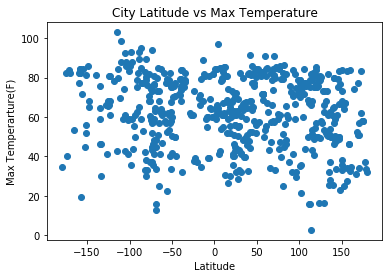

In [31]:
plt.scatter(CW['Lat'], CW['Max Temp'])
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperarture(F)')
plt.show()

#### Latitude vs. Humidity Plot

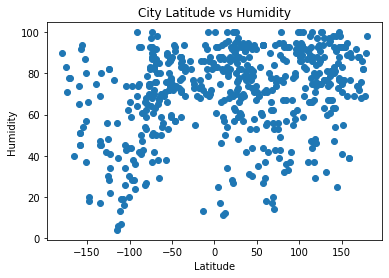

In [35]:
plt.scatter(CW['Lat'], CW['Humidity'])
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

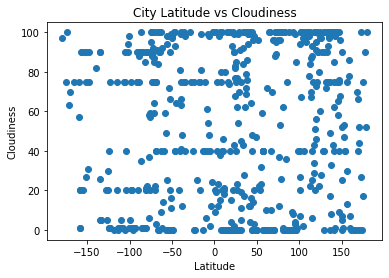

In [34]:
plt.scatter(CW['Lat'], CW['Cloudiness'])
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

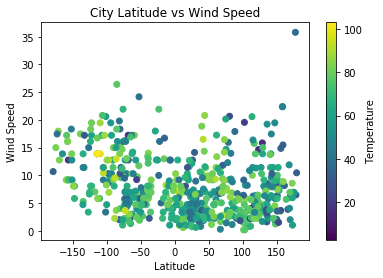

In [152]:
plt.scatter(CW['Lat'], CW['Wind Speed'],
            
c=CW['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")
            
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [68]:
# Create Northern and Southern Hemisphere DataFrames

CW_north = CW.loc[(CW['Lat']>=0)] 
CW_south = CW.loc[(CW['Lat']<0)] 

# CW_north.sort_values(by=['City'])
# CW_south.sort_values(by=['City'])

In [51]:
# OPTIONAL: Create a function to create Linear Regression plots


####  Northern Hemiasphere - Max Temp vs. Latitude Linear Regression

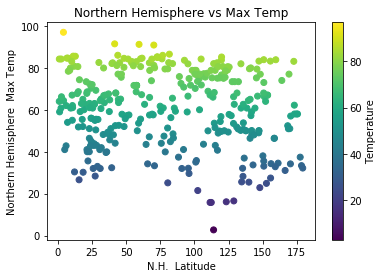

In [133]:
plt.scatter(CW_north['Lat'], CW_north['Max Temp'],

c=CW_north['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")

plt.title("Northern Hemisphere vs Max Temp")
plt.xlabel('N.H.  Latitude')
plt.ylabel('Northern Hemisphere  Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

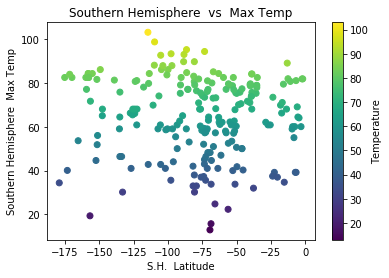

In [134]:
plt.scatter(CW_south['Lat'], CW_south['Max Temp'],
            
c=CW_south['Max Temp'])
clb = plt.colorbar()
clb.set_label('Temperature')

plt.title("Southern Hemisphere  vs  Max Temp")
plt.xlabel('S.H.  Latitude')
plt.ylabel('Southern Hemisphere  Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

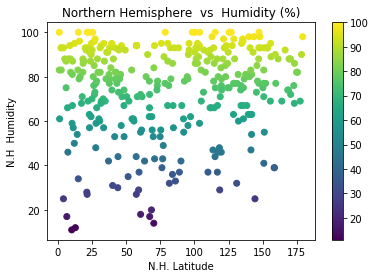

In [140]:
plt.scatter(CW_north['Lat'], CW_north['Humidity'],

c=CW_north['Humidity'])
clb = plt.colorbar()
# clb.set_label('Humidity (%)')

plt.title("Northern Hemisphere  vs  Humidity (%)")
plt.xlabel('N.H. Latitude')
plt.ylabel('N.H  Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

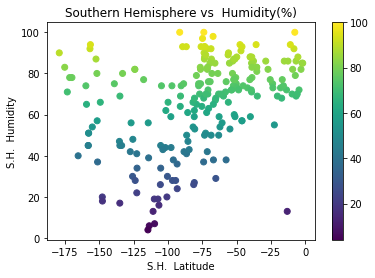

In [141]:
plt.scatter(CW_south['Lat'], CW_south['Humidity'],
            
c=CW_south['Humidity'])
clb = plt.colorbar()
# clb.set_label('S.H. Humidity (%)')

plt.title("Southern Hemisphere vs  Humidity(%)")
plt.xlabel('S.H.  Latitude')
plt.ylabel('S.H.  Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

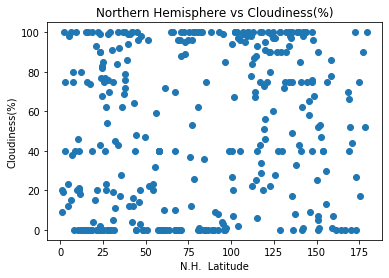

In [145]:
plt.scatter(CW_north['Lat'], CW_north['Cloudiness'],

# c=CW_north['Max Temp'])
# clb = plt.colorbar()
# # clb.set_label("Max Temp"
           )

plt.title("Northern Hemisphere vs Cloudiness(%)")
plt.xlabel('N.H.  Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

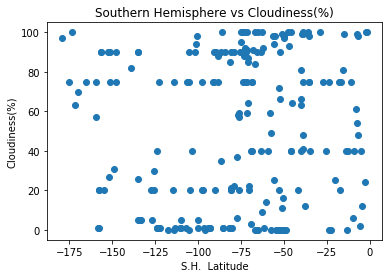

In [127]:
plt.scatter(CW_south['Lat'], CW_south['Cloudiness'],
            
# c=CW_south['Max Temp'])
# clb = plt.colorbar()
# clb.set_label("Max Temp"
             )

plt.title("Southern Hemisphere vs Cloudiness(%)")
plt.xlabel('S.H.  Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

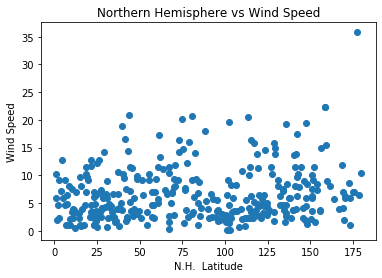

In [149]:
plt.scatter(CW_north['Lat'], CW_north['Wind Speed'],

# c=CW_north['Max Temp'])
# clb = plt.colorbar()
# clb.set_label("Max Temp"
             )

plt.title("Northern Hemisphere vs Wind Speed")
plt.xlabel('N.H.  Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

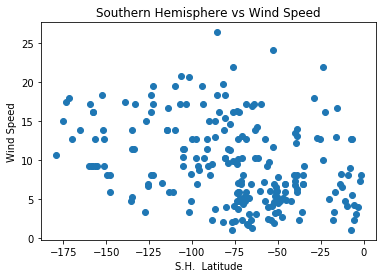

In [126]:
plt.scatter(CW_south['Lat'], CW_south['Wind Speed'],
            
# c=CW_south['Max Temp'])
# clb = plt.colorbar()
# clb.set_label("Max Temp"
             )

plt.title("Southern Hemisphere vs Wind Speed")
plt.xlabel('S.H.  Latitude')
plt.ylabel('Wind Speed')

plt.show()

World City Tempurature


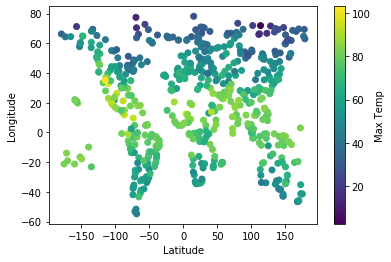

World Tempurature


In [76]:
print('World City Tempurature')

plt.scatter(CW['Lat']
            ,CW['Lng']
            ,c=CW['Max Temp'])

clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
clb.set_label("Max Temp")
plt.show()
print('World Tempurature')